In [6]:
import pandas as pd
import numpy as np
characters = pd.read_csv('https://query.data.world/s/fzwghuindwtmxy6wnwjdq2tcgyf2y4')

In [7]:
#characters.set_index(['id'],inplace = True)
#characters.head()

In [8]:
characters.gender

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
6692      m
6693      m
6694      m
6695      m
6696      m
6697      m
6698      m
6699      m
6700      f
6701      m
6702      m
6703      f
6704      f
6705      m
6706      f
6707      f
6708      m
6709      m
6710      f
6711      m
6712      f
6713      f
6714      m
6715      m
6716      m
6717      m
6718      f
6719      m
6720      m
6721      m
Name: gender, Length: 6722, dtype: object

# populating genders

In [9]:
characters2 = characters.copy()
characters2.groupby('gender').count()['id']

gender
f     71
m    252
Name: id, dtype: int64

In [10]:
def gender_role(x):
    
    f = 'mrs','madam','miss','lady','female','ms','mother','aunt','wife','waitress','lady','daughter','mom','sister','woman','women','girl'
    m = 'boy','father','uncle','husband','male','waiter','guy','son','mr','dad','brother','man','men'

    if any(i in x for i in f):
        return 'f'
    if any(i in x for i in m):
        return 'm'
    else: return 'Unknown'

In [11]:
characters2['populated_gender'] = characters2.normalized_name.map(gender_role)

characters2.gender.fillna(characters2['populated_gender'],inplace = True)
characters2.head()

,id,name,normalized_name,gender,populated_gender
0,7,Children,children,Unknown,Unknown
1,12,Mechanical Santa,mechanical santa,Unknown,Unknown
2,13,Tattoo Man,tattoo man,m,m
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,Unknown,Unknown
4,20,Students,students,Unknown,Unknown


In [12]:
# Delete extra column
del characters2['populated_gender']

In [13]:
characters2.drop_duplicates(inplace = True)

In [14]:
characters2[characters2['gender'] == 'Unknown'].head()

,id,name,normalized_name,gender
0,7,Children,children,Unknown
1,12,Mechanical Santa,mechanical santa,Unknown
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,Unknown
4,20,Students,students,Unknown
6,26,Lewis Clark,lewis clark,Unknown


In [15]:
from matplotlib import pyplot as plt
%matplotlib notebook

In [16]:
counts = characters2.groupby('gender').count()['id']

In [17]:
counts

gender
Unknown    4845
f           579
m          1298
Name: id, dtype: int64

<BarContainer object of 3 artists>

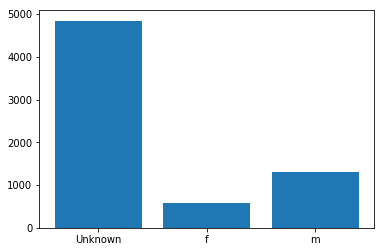

In [18]:
plt.bar(counts.index,counts)

In [19]:
characters2[characters2['id'] == 464]

,id,name,normalized_name,gender
517,464,Miss Hoover,miss hoover,f


In [20]:
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 4 columns):
id                 6722 non-null int64
name               6722 non-null object
normalized_name    6722 non-null object
gender             323 non-null object
dtypes: int64(1), object(3)
memory usage: 210.1+ KB
